# Heart Disease

What features are most important in determing the likelihood of a heart attack?

## Import relevant packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Explore Data

In [2]:
heart = pd.read_csv('heart.csv')

In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.shape

(303, 14)

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart['cp'].unique()

array([3, 2, 1, 0])

## Define features

**age**: Age of patient

**sex**: Sex of patient
- 0 = Female
- 1 = Male

**cp**: Chest pain type 
- 0 = typical angina
- 1 = atypical angina
- 2 = non-anginal pain
- 3 = asymptomatic 0-3

**trestbps**: Resting blood pressure (mmHg)

**chol**: Serum cholestoral (mg/dl)

**fbs**: Fasting blood sugar (>120mg/dl)
- 0 = False
- 1 = True

**restecg**: Resting electrocardiographic results
- 0 = Normal
- 1 = ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- 2 = Porbable or definite left ventricular hypertrophy (by Estes/ criteria)

**thalach**: Maximum heart rate achieved

**exang**: Exercise induced angina
- 0 = No
- 1 = Yes

**oldpeak**: ST depression induced by exercise relative to rest

**slope**: Slope of peak exercise ST segment

**ca**: Number of major blood vessels supplying blood to heart

**thal**: Type of thalassemia
- 1 = Normal
- 2 = Fixed defect
- 3 = Reversible defect

**target**: Whether ot not a heart attack occured
- 0 = No heart attack
- 1 = Heart attack

## Clean Data

#### Rename Columns

In [7]:
heart.rename(columns={'cp':'Chest Pain Type',
                      'trestbps':'Resting Blood Pressure (mmHg)',
                      'chol':'Serum Cholestoral (mg/dl)',
                      'fbs':'Fasting Blood Sugar (>120mg/dl)',
                      'restecg':'Resting ECG',
                      'thalach':'Max Heart Rate',
                      'exang':'Exercise Induced Angina',
                      'oldpeak':'Old Peak',
                      'ca':'Major Blood Vessels',
                      'thal':'Thalassemia Type',
                      'target':'Heart Attack'
                     }, inplace=True)

In [8]:
heart.columns = heart.columns.str.title()

#### Drop null columns

In [9]:
# Thalassemia Type should only have values 1-3
heart['Thalassemia Type'].value_counts()

2    166
3    117
1     18
0      2
Name: Thalassemia Type, dtype: int64

In [10]:
heart = heart[heart['Thalassemia Type'] != 0]

## Correlations

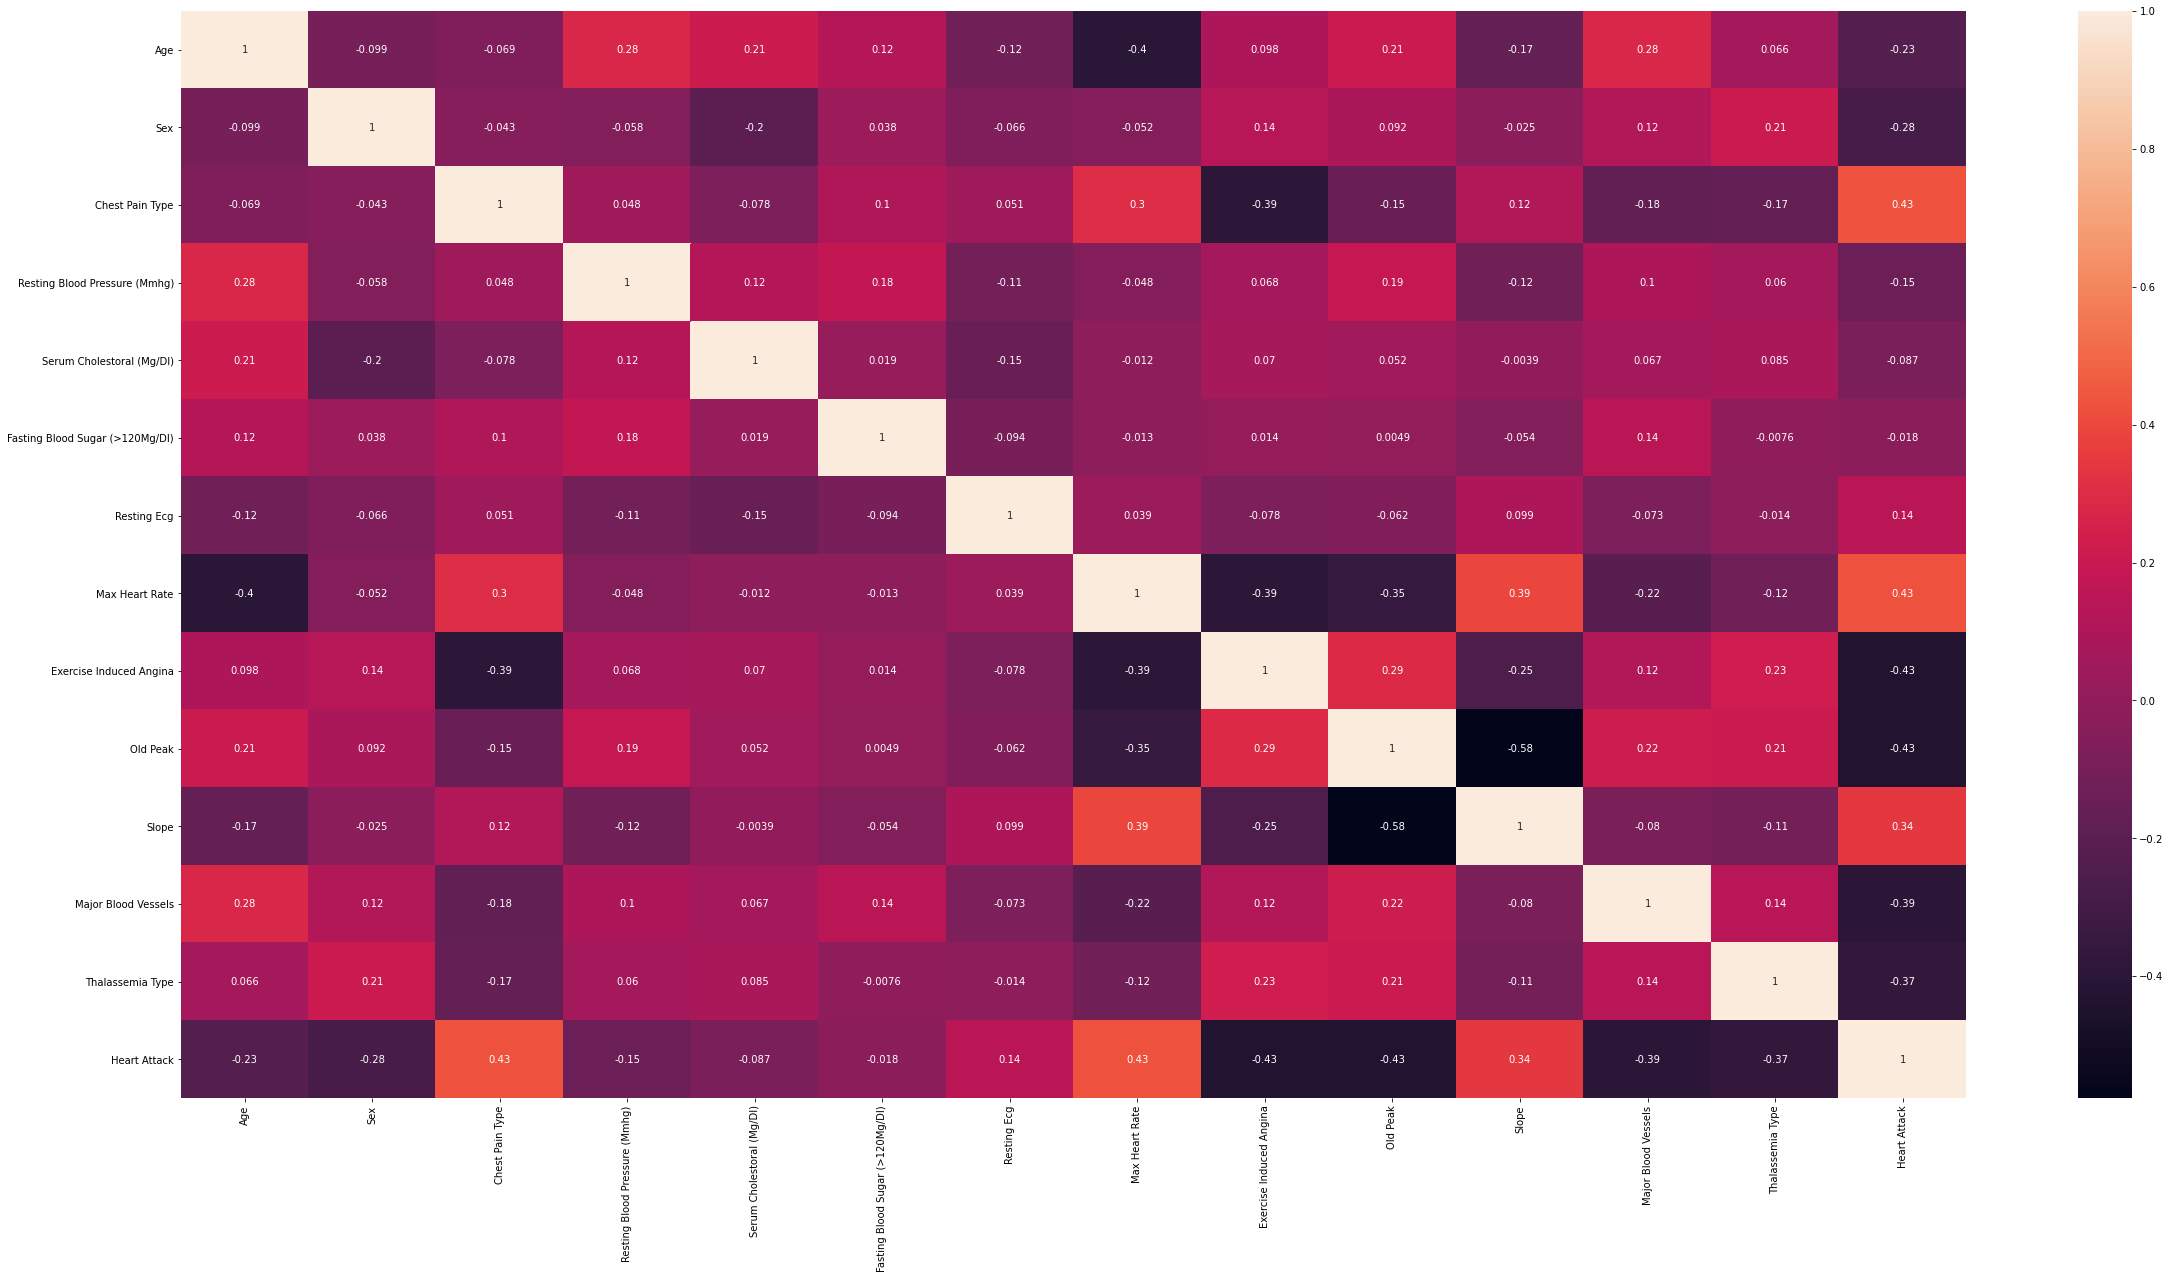

In [11]:
plt.figure(figsize=(40,20))
heatmap = sns.heatmap(heart.corr(), annot=True)

### Moderate correlations (0.3-0.7)

#### Direct correlations with Heart Attack
- -0.34: Heart Attack vs. Thalassemia Type
-  0.35: Heart Attack vs. Slope
- -0.39: Heart Attack vs. Major Blood Vessels
-  0.42: Heart Attack vs. Max Heart Rate
- -0.43: Heart Attack vs. Old Peak
-  0.44: Heart Attack vs. Chest Pain Type
- -0.44: Heart Attack vs. Exercise Induced Angina

#### Other correlations
- -0.40: Age vs. Max Heart Rate
-  0.30: Chest Pain Type vs. Max Heart Rate
- -0.39: Chest Pain Type vs. Exercise Induced Angina
- -0.38: Max Heart Rate vs. Exercise Induced Angina 
- -0.34: Max Heart Rate vs. Old Peak
-  0.39: Max Heart Rate vs. Slope
- -0.58: Old Peak vs. Slope

## Correlation Graphs

In [12]:
sns.set_theme(font_scale=1.5, rc={'axes.facecolor':'lightgray', 'figure.facecolor':'darkgray', 'axes.grid':False, 'figure.figsize':(12,7)})

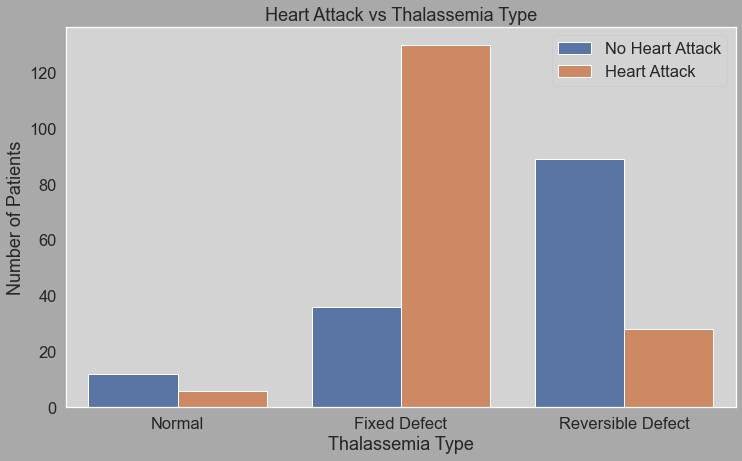

In [13]:
_ = sns.countplot(data=heart, x='Thalassemia Type', hue='Heart Attack')
_ = plt.legend(['No Heart Attack', 'Heart Attack'])
_ = plt.xticks([0,1,2],['Normal', 'Fixed Defect', 'Reversible Defect'])
_ = plt.title('Heart Attack vs Thalassemia Type')
_ = plt.xlabel('Thalassemia Type')
_ = plt.ylabel('Number of Patients')

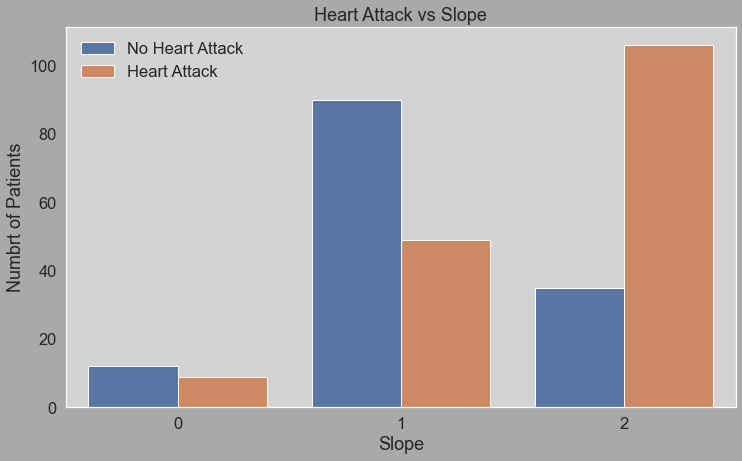

In [14]:
_ = sns.countplot(data=heart, x='Slope', hue='Heart Attack')
_ = plt.legend(['No Heart Attack', 'Heart Attack'])
_ = plt.title('Heart Attack vs Slope')
_ = plt.ylabel('Numbrt of Patients')

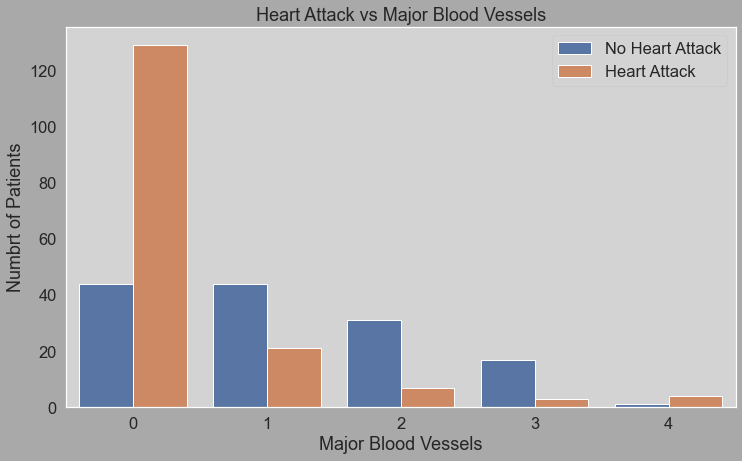

In [15]:
_ = sns.countplot(data=heart, x='Major Blood Vessels', hue='Heart Attack')
_ = plt.legend(['No Heart Attack', 'Heart Attack'])
_ = plt.title('Heart Attack vs Major Blood Vessels')
_ = plt.ylabel('Numbrt of Patients')

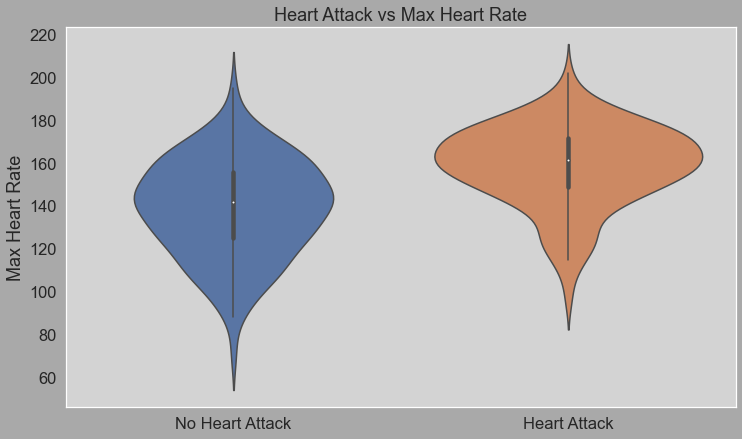

In [16]:
_ = sns.violinplot(data=heart, x='Heart Attack', y='Max Heart Rate')
_ = plt.xticks([0,1],['No Heart Attack', 'Heart Attack'])
_ = plt.title('Heart Attack vs Max Heart Rate')
_ = plt.xlabel('')

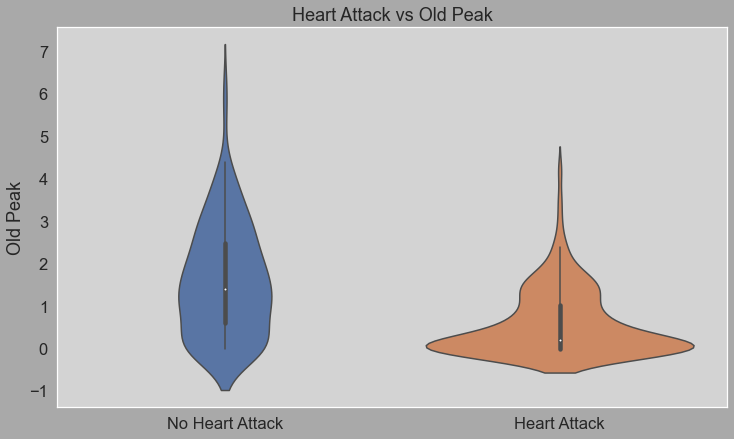

In [17]:
_ = sns.violinplot(data=heart, x='Heart Attack', y='Old Peak')
_ = plt.xticks([0,1],['No Heart Attack', 'Heart Attack'])
_ = plt.title('Heart Attack vs Old Peak')
_ = plt.xlabel('')

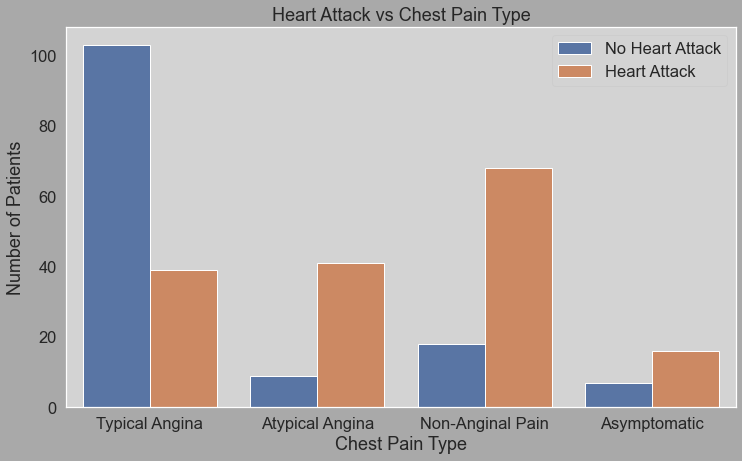

In [18]:
_ = sns.countplot(data=heart, x='Chest Pain Type', hue='Heart Attack')
_ = plt.legend(['No Heart Attack', 'Heart Attack'])
_ = plt.xticks([0,1,2,3],['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
_ = plt.title('Heart Attack vs Chest Pain Type')
_ = plt.ylabel('Number of Patients')

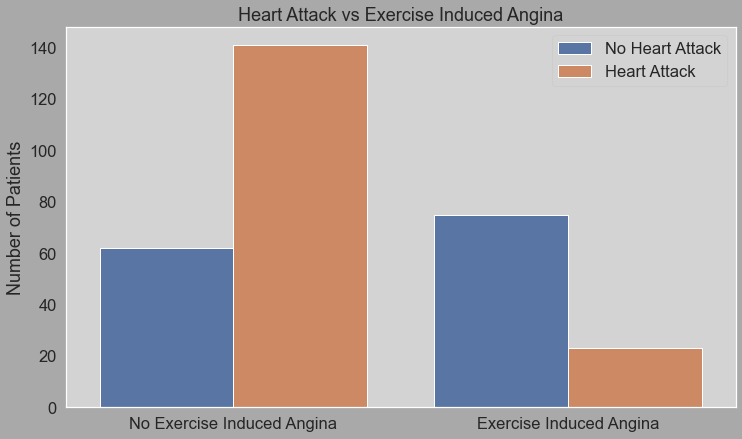

In [19]:
_ = sns.countplot(data=heart, x='Exercise Induced Angina', hue='Heart Attack')
_ = plt.legend(['No Heart Attack', 'Heart Attack'])
_ = plt.xticks([0,1],['No Exercise Induced Angina', 'Exercise Induced Angina'])
_ = plt.title('Heart Attack vs Exercise Induced Angina')
_ = plt.xlabel('')
_ = plt.ylabel('Number of Patients')

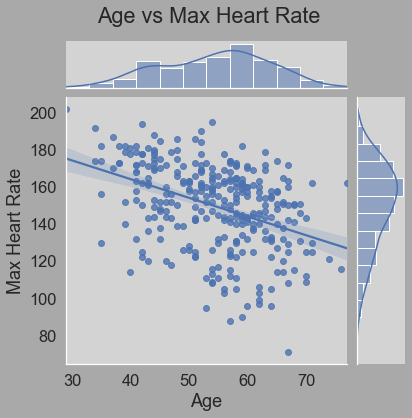

In [20]:
_ = sns.jointplot(data=heart, x='Age', y='Max Heart Rate', kind='reg')
_ = plt.subplots_adjust(top=0.9)
_ = plt.suptitle('Age vs Max Heart Rate')

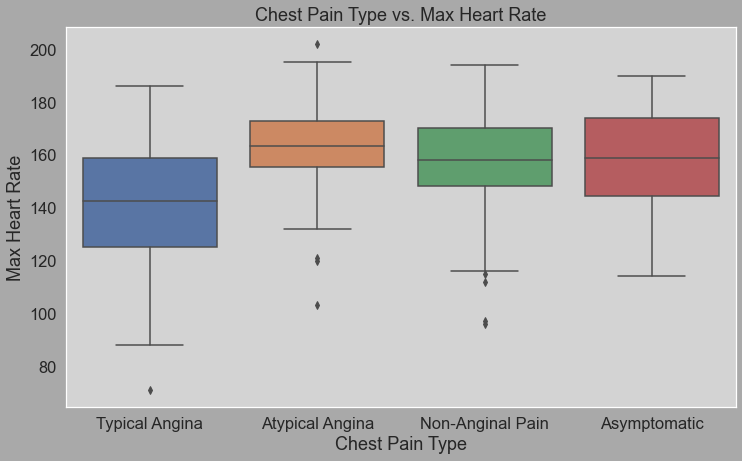

In [21]:
_ = sns.boxplot(data=heart, x='Chest Pain Type', y='Max Heart Rate')
_ = plt.xticks([0,1,2,3],['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
_ = plt.title('Chest Pain Type vs. Max Heart Rate')

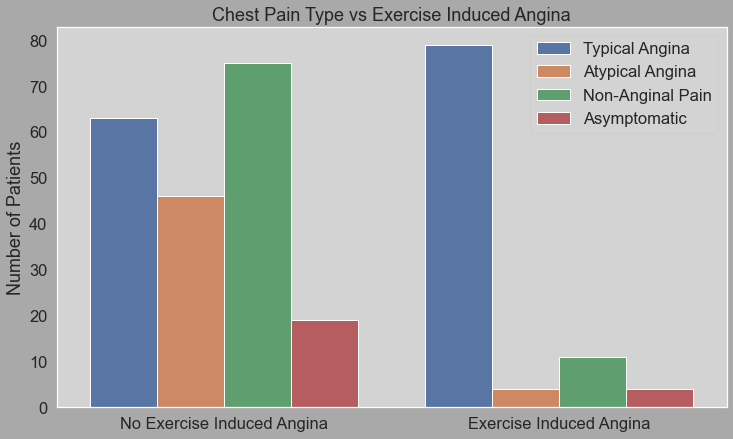

In [22]:
_ = sns.countplot(data=heart, x='Exercise Induced Angina', hue='Chest Pain Type')
_ = plt.legend(['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
_ = plt.xticks([0,1],['No Exercise Induced Angina', 'Exercise Induced Angina'])
_ = plt.title('Chest Pain Type vs Exercise Induced Angina')
_ = plt.xlabel('')
_ = plt.ylabel('Number of Patients')

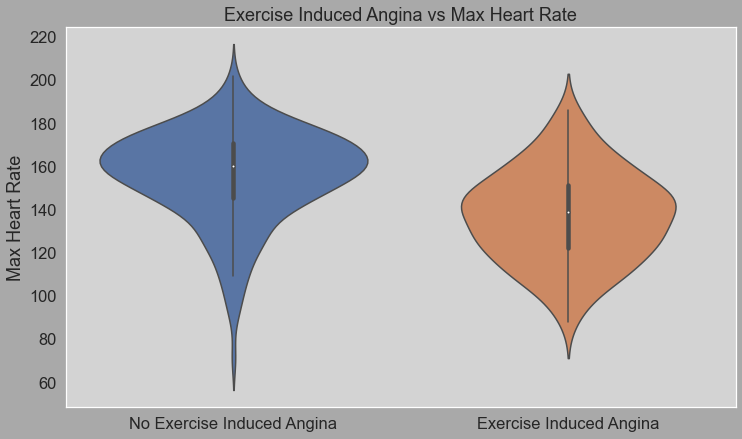

In [23]:
_ = sns.violinplot(data=heart, x='Exercise Induced Angina', y='Max Heart Rate')
_ = plt.xticks([0,1],['No Exercise Induced Angina', 'Exercise Induced Angina'])
_ = plt.title('Exercise Induced Angina vs Max Heart Rate')
_ = plt.xlabel('')

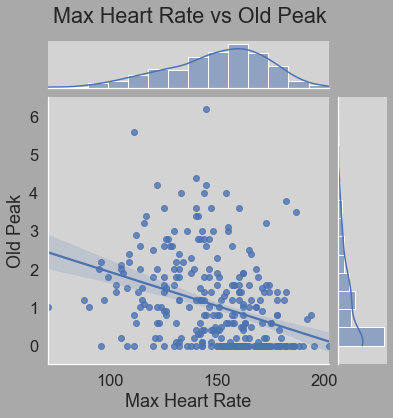

In [24]:
_ = sns.jointplot(data=heart, x='Max Heart Rate', y='Old Peak', kind='reg')
_ = plt.subplots_adjust(top=0.9)
_ = plt.suptitle('Max Heart Rate vs Old Peak')

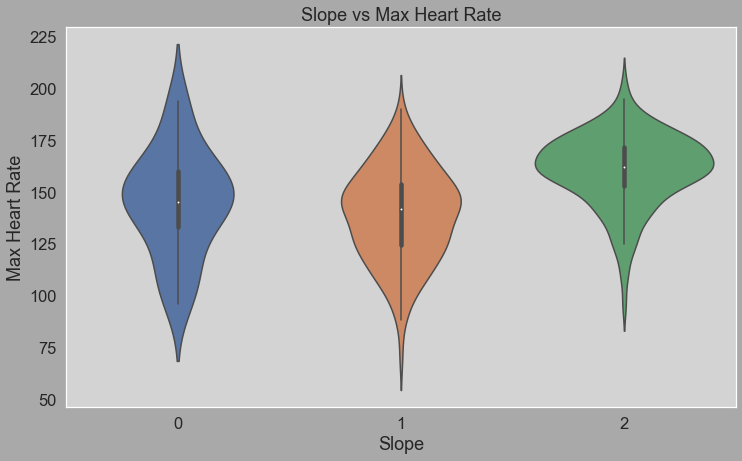

In [25]:
_ = sns.violinplot(data=heart, x='Slope', y='Max Heart Rate')
_ = plt.title('Slope vs Max Heart Rate')

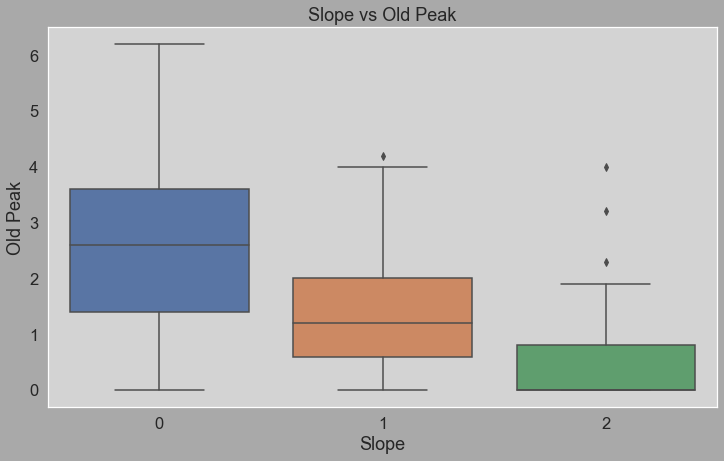

In [26]:
_ = sns.boxplot(data=heart, x='Slope', y='Old Peak')
_ = plt.title('Slope vs Old Peak')